In [94]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

# Importing necessary libraries
import pandas as pd
# Importing necessary libraries
import seaborn as sns
# Importing necessary libraries
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [95]:
# Loading the dataset into a pandas DataFrame
telco = pd.read_csv('telco_customer_data.csv')
# Displaying a random sample of rows from the dataset
telco.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1647,5442-XSDCW,Male,0,Yes,Yes,11,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),79.50,868.5,Yes
426,2806-MLNTI,Male,1,Yes,No,52,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),105.10,5376.4,No
6889,7952-OBOYL,Male,0,No,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Month-to-month,Yes,Mailed check,89.85,244.45,No
3828,8747-UDCOI,Female,0,Yes,No,65,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.35,1319.95,No
5786,8661-BOYNW,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),84.40,6096.45,No


In [96]:

telco = telco.loc[~telco['TotalCharges'].str.contains(' ')]
# Converting data types for consistency
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')
# Handling missing values by filling them with the mean of the column
telco['TotalCharges'].fillna(telco['TotalCharges'].mean(), inplace=True)
# Displaying a random sample of rows from the dataset
telco.sample(5)


C:\Users\sk3696\AppData\Local\Temp\ipykernel_17920\2715602070.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telco['TotalCharges'].fillna(telco['TotalCharges'].mean(), inplace=True)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1606,6374-NTQLP,Male,1,Yes,Yes,72,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104.10,7447.70,No
487,3649-JPUGY,Male,0,No,No,72,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),88.60,6201.95,No
6056,8331-ZXFOE,Female,0,No,No,58,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,One year,Yes,Credit card (automatic),71.10,4299.20,No
1822,4911-BANWH,Female,0,No,Yes,31,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),86.55,2697.40,Yes
2805,9372-TXXPS,Female,0,Yes,No,60,Yes,No,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),59.85,3483.45,No


In [97]:
# Verify data type
# Printing output for verification
print("Data type of TotalCharges after cleaning:", telco['TotalCharges'].dtype)

Data type of TotalCharges after cleaning: float64


In [98]:
#inconsistencies in relation to a “no internet service” value present in the few columns or variables such as MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies. 
# Check for inconsistencies
# Checking the distribution of categorical variables
print(telco['MultipleLines'].value_counts())
# Checking the distribution of categorical variables
print(telco['OnlineSecurity'].value_counts())
#Replace “No internet service” with “No”
# Replacing 'No internet service' values with 'No' for consistency
columns_to_replace = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# Replacing 'No internet service' values with 'No' for consistency
for column in columns_to_replace:
# Replacing 'No internet service' values with 'No' for consistency
    telco[column] = telco[column].replace({'No internet service': 'No'})


MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


In [99]:
# Printing output for verification
print(telco.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [100]:
#changing respective datatypes
# Converting data types for consistency
telco['SeniorCitizen'] = telco['SeniorCitizen'].astype('category')
# Converting data types for consistency
telco['MonthlyCharges'] = pd.to_numeric(telco['MonthlyCharges'], errors='coerce')
# Converting data types for consistency
telco['PaymentMethod'] = telco['PaymentMethod'].astype('category')
telco['tenure_group'] = pd.cut(telco['tenure'], bins=[0, 12, 24, 48, 72], labels=['0-12', '12-24', '24-48', '48-72']) #label encoding


In [101]:
# Handling missing values by filling them with the mean of the column
telco['MonthlyCharges'].fillna(telco['MonthlyCharges'].mean(), inplace=True)

C:\Users\sk3696\AppData\Local\Temp\ipykernel_17920\3031813090.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telco['MonthlyCharges'].fillna(telco['MonthlyCharges'].mean(), inplace=True)


In [102]:
# Printing output for verification
print(telco.dtypes)

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
tenure_group        category
dtype: object


Number of customers who said 'No': 5163
Number of customers who said 'Yes': 1869


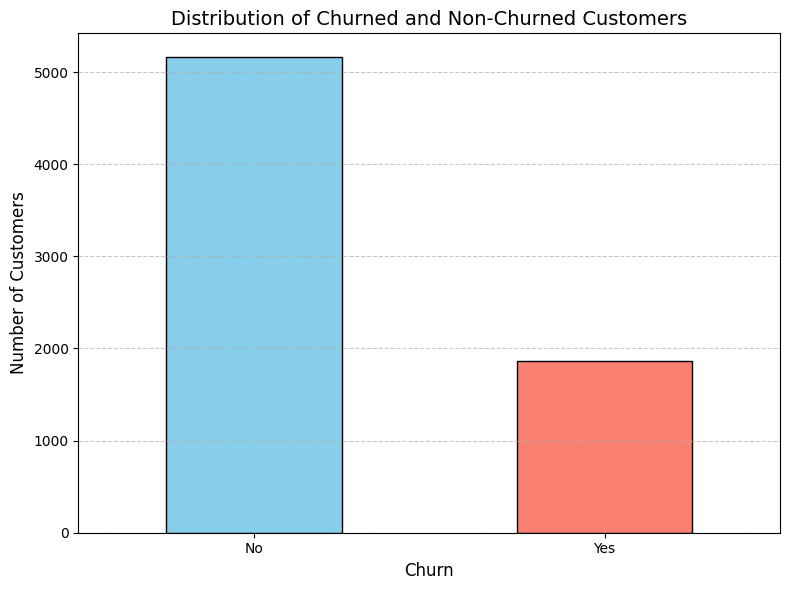

In [103]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Count the occurrences of each category in the 'Churn' column
# Checking the distribution of categorical variables
churn_counts = telco['Churn'].value_counts()

# Printing output for verification
print("Number of customers who said 'No':", churn_counts['No'])
# Printing output for verification
print("Number of customers who said 'Yes':", churn_counts['Yes'])

# bar chart
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Add title and labels
plt.title('Distribution of Churned and Non-Churned Customers', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


###Descriptive questions

The average tenure of churned customers is: 17.98 months
The average tenure of non-churned customers is: 37.65 months


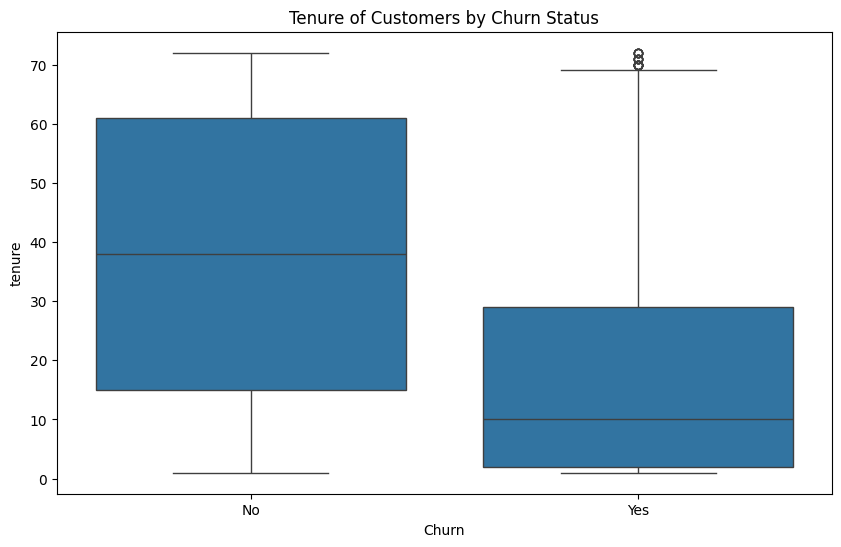

In [104]:
#Q1: Average tenure of churned customers vs. non-churned customers.
avg_tenure_churned = telco[telco['Churn'] == 'Yes']['tenure'].mean()
avg_tenure_non_churned = telco[telco['Churn'] == 'No']['tenure'].mean()

# Printing output for verification
print(f"The average tenure of churned customers is: {avg_tenure_churned:.2f} months")
# Printing output for verification
print(f"The average tenure of non-churned customers is: {avg_tenure_non_churned:.2f} months")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=telco)
plt.title('Tenure of Customers by Churn Status')
plt.show()


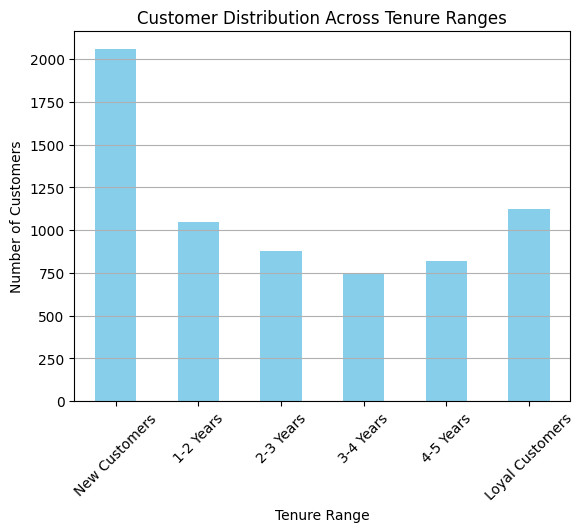

In [105]:
#Q2. What is the distribution of customers based on their tenure with the company? (changed from age as the age variable is not available.)

# Importing necessary libraries
import pandas as pd
# Importing necessary libraries
import matplotlib.pyplot as plt

# Define tenure bins and labels
bins = [0, 12, 24, 36, 48, 60, telco['tenure'].max()]
labels = ['New Customers', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', 'Loyal Customers']

# Create a new column for tenure range
telco['TenureRange'] = pd.cut(telco['tenure'], bins=bins, labels=labels, right=False)

# Calculate the distribution of customers across tenure ranges
# Checking the distribution of categorical variables
tenure_dist = telco['TenureRange'].value_counts().sort_index()

# bar chart for the distribution
tenure_dist.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution Across Tenure Ranges')
plt.xlabel('Tenure Range')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()




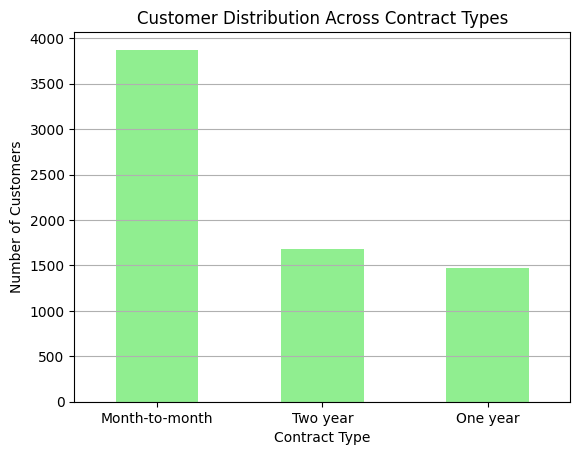

In [106]:
#Q3.	Distribution of customers across different contract types.
# Checking the distribution of categorical variables
contract_dist = telco['Contract'].value_counts()


contract_dist.plot(kind='bar', color='lightgreen')
plt.title('Customer Distribution Across Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



The average total charges for contract type 'Month-to-month' is: $1369.25
The average total charges for contract type 'One year' is: $3034.68
The average total charges for contract type 'Two year' is: $3728.93


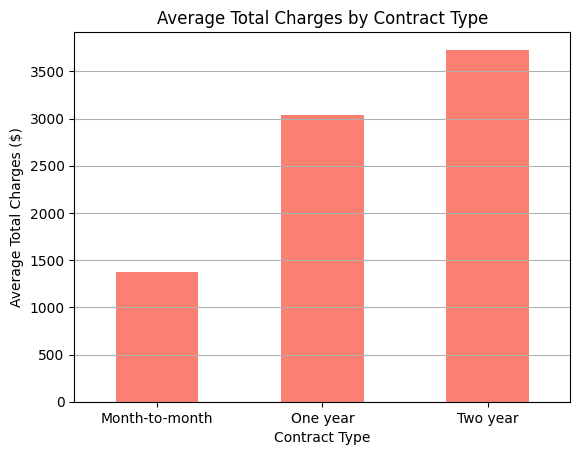

In [107]:
#Q4.	Comparison of average total charge respective to the different contact types based on monthly, annual, etc..,
avg_total_charge_by_contract = telco.groupby('Contract')['TotalCharges'].mean()
for contract, avg_charge in avg_total_charge_by_contract.items():
# Printing output for verification
    print(f"The average total charges for contract type '{contract}' is: ${avg_charge:.2f}")
# Plotting the results
avg_total_charge_by_contract.plot(kind='bar', color='salmon')
plt.title('Average Total Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Average Total Charges ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Correlation between total number of services and churn: -0.07


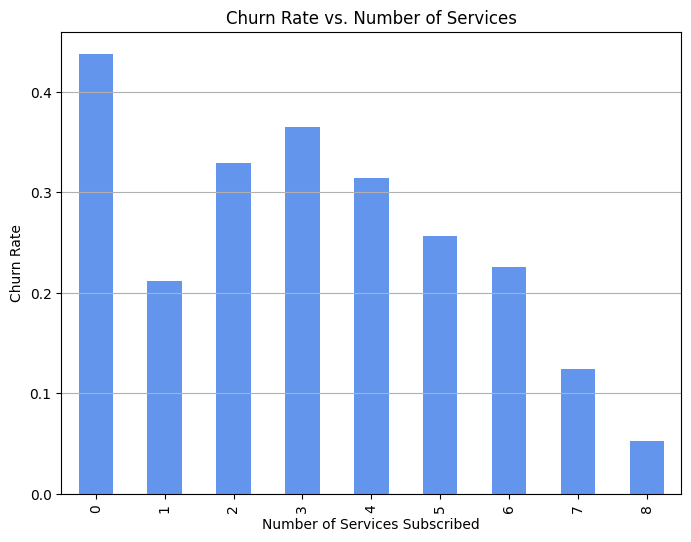

In [108]:
#Q5.	Will there be any correlation between the number of services customers subscribe to and their likelihood of churning?



# Define service columns
service_columns = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies']

# Convert relevant service columns to numerical values (1 for 'Yes', 0 for 'No')
# If a value is not 'Yes' or 'No', it will be set to 0
for col in service_columns:
    telco[col] = telco[col].apply(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else 0)

# Create a new column that counts the total number of services a customer subscribes to
telco['TotalServices'] = telco[service_columns].sum(axis=1)

# Convert 'Churn' to binary (1 for 'Yes', 0 for 'No')
telco['ChurnBinary'] = telco['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate the correlation between the number of services and churn
correlation = telco[['TotalServices', 'ChurnBinary']].corr().iloc[0, 1]
# Printing output for verification
print(f"Correlation between total number of services and churn: {correlation:.2f}")

# Visualize the distribution of churn based on the number of services
plt.figure(figsize=(8, 6))
telco.groupby('TotalServices')['ChurnBinary'].mean().plot(kind='bar', color='cornflowerblue')
plt.title('Churn Rate vs. Number of Services')
plt.xlabel('Number of Services Subscribed')
plt.ylabel('Churn Rate')
plt.grid(axis='y')
plt.show()



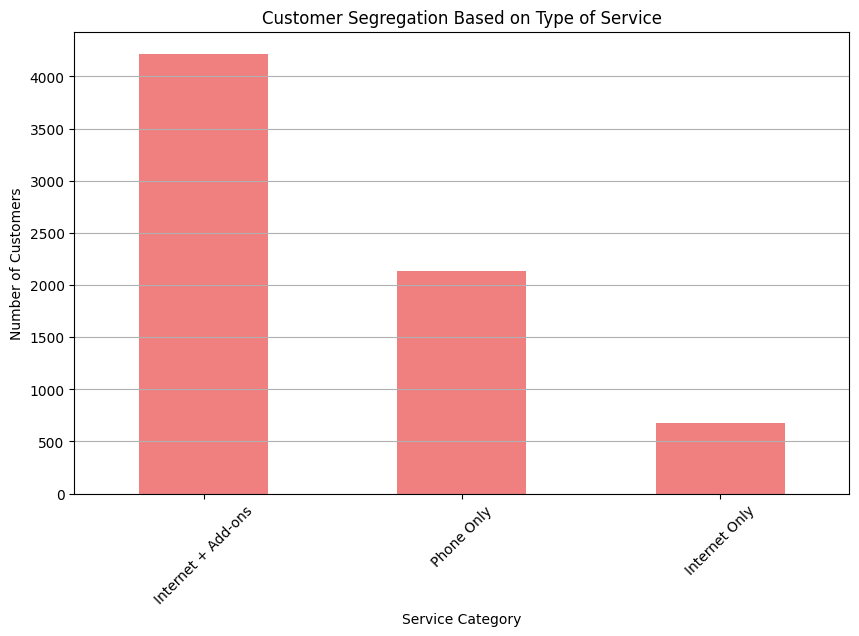

In [109]:
#Q6.	Segregation of customers based on the type of service

# Convert service columns to binary values (1 for 'Yes', 0 for 'No')
service_columns = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies']
# Replacing 'No internet service' values with 'No' for consistency
telco[service_columns] = telco[service_columns].apply(lambda x: x.replace({'Yes': 1, 'No': 0}))

# Categorize customers based on their subscriptions
def categorize_customer(row):
    if row['PhoneService'] == 1 and row[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                                         'TechSupport', 'StreamingTV', 'StreamingMovies']].sum() == 0:
        return 'Phone Only'
    elif row['InternetService'] != 'No' and row[['PhoneService', 'MultipleLines']].sum() == 0:
        return 'Internet Only'
    elif row['InternetService'] != 'No' and row[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                                                  'TechSupport', 'StreamingTV', 'StreamingMovies']].sum() > 0:
        return 'Internet + Add-ons'
    elif row[['PhoneService', 'InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].sum() > 4:
        return 'Comprehensive Package'
    else:
        return 'Other'

# Create a new column for customer category
telco['CustomerCategory'] = telco.apply(categorize_customer, axis=1)

# Count the number of customers in each category
# Checking the distribution of categorical variables
category_counts = telco['CustomerCategory'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='lightcoral')
plt.title('Customer Segregation Based on Type of Service')
plt.xlabel('Service Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


###Predictive questions:

C:\Users\sk3696\AppData\Local\Temp\ipykernel_17920\3120293770.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telco['TotalCharges'].fillna(telco['TotalCharges'].mean(), inplace=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.49      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110

Confusion Matrix:
 [[1379  170]
 [ 287  274]]
AUC-ROC Score: 0.82


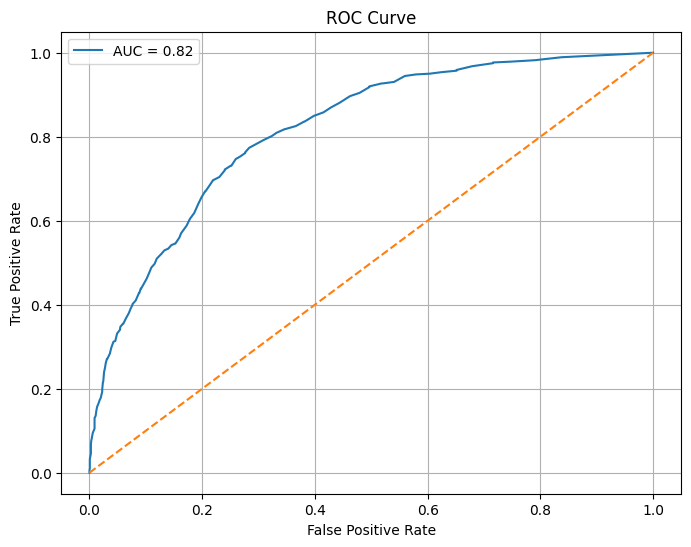

In [110]:

#RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve



# Step 1: Data Preprocessing
# Convert 'TotalCharges' to numeric, handling errors
# Converting data types for consistency
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')

# Fill missing values in 'TotalCharges' with the mean
# Handling missing values by filling them with the mean of the column
telco['TotalCharges'].fillna(telco['TotalCharges'].mean(), inplace=True)

# Convert categorical columns to numerical using Label Encoding
label_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
              'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
              'PaperlessBilling', 'PaymentMethod', 'Churn']

le = LabelEncoder()
for col in label_cols:
    telco[col] = le.fit_transform(telco[col])

# Step 2: Feature Selection
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
            'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 
            'MonthlyCharges', 'TotalCharges']
target = 'Churn'

# Step 3: Train-Test Split
X = telco[features]
y = telco[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Feature Scaling (Optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Model Building - Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Print Classification Report
# Printing output for verification
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Printing output for verification
print("Confusion Matrix:\n", conf_matrix)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
# Printing output for verification
print(f"AUC-ROC Score: {roc_auc:.2f}")

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.65      0.53      0.59       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110

Confusion Matrix:
 [[1386  163]
 [ 261  300]]
AUC-ROC Score: 0.84


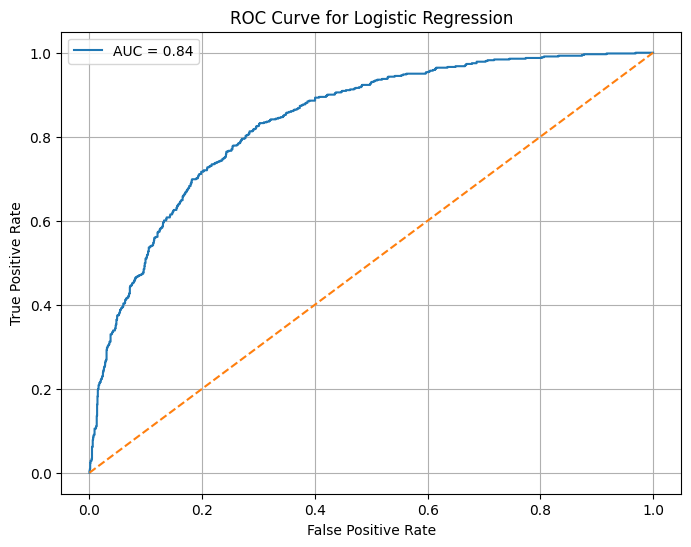

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# Importing necessary libraries
import matplotlib.pyplot as plt

# Train Logistic Regression Model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Classification Report
# Printing output for verification
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Printing output for verification
print("Confusion Matrix:\n", conf_matrix)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
# Printing output for verification
print(f"AUC-ROC Score: {roc_auc:.2f}")

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()


Top 10 Most Important Features:
              Feature  Importance
17    MonthlyCharges    0.194109
18      TotalCharges    0.190285
4             tenure    0.164788
14          Contract    0.093667
16     PaymentMethod    0.049953
7    InternetService    0.043665
0             gender    0.027060
15  PaperlessBilling    0.025632
8     OnlineSecurity    0.023479
11       TechSupport    0.023237


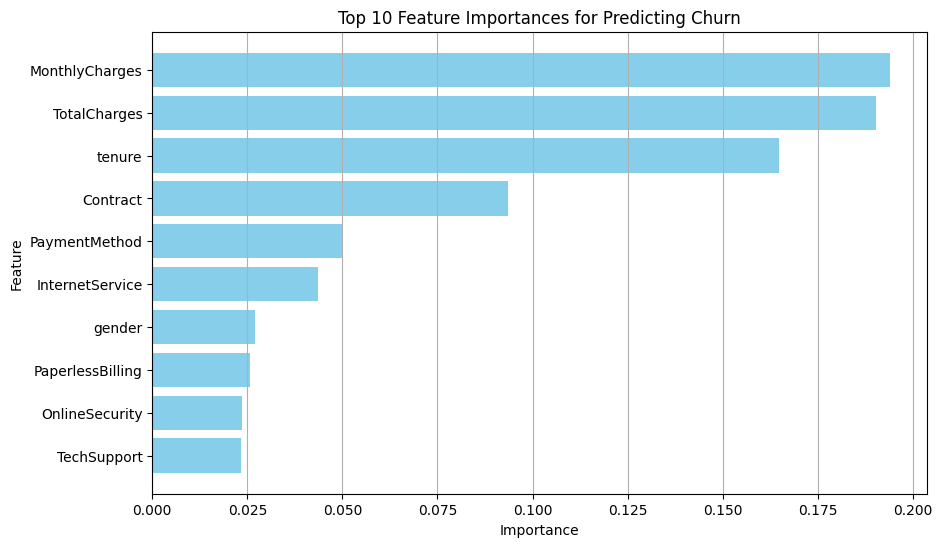

In [112]:
# Extract Feature Importances
# Importing necessary libraries
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
# Importing necessary libraries
importance_data = pd.DataFrame({'Feature': features, 'Importance': importances})
# Importing necessary libraries
importance_data = importance_data.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
# Printing output for verification
print("Top 10 Most Important Features:\n", importance_data.head(10))

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_data['Feature'][:10], importance_data['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances for Predicting Churn')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()